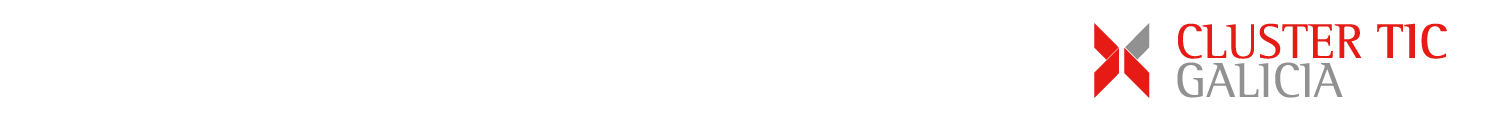
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Medición de tiempos de ejecución</div>

En Python, hay varias formas de medir el tiempo de ejecución de nuestro código, cada una adecuada para diferentes necesidades y escenarios. Revisemos algunos de estos métodos:

# Cell y line magics

Ya hemos visto que podemos usar las "magics" *%time*, *%%time*, *%timeit* y *%%timeit* para medir los tiempos de ejecución de una línea de código o de una celda completa, y medirlo una vez o un número definido de veces.

In [1]:
%%time
result = sum(range(10000000))

CPU times: total: 312 ms
Wall time: 315 ms


In [2]:
%time result = sum(range(10000000))

CPU times: total: 297 ms
Wall time: 300 ms


In [3]:
%%timeit -r 3 -n 8
result = sum(range(10000000))

292 ms ± 3.1 ms per loop (mean ± std. dev. of 3 runs, 8 loops each)


In [4]:
%timeit -r 3 -n 8 result = sum(range(10000000))

294 ms ± 488 µs per loop (mean ± std. dev. of 3 runs, 8 loops each)


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# La librería time

### time.time()

También sabemos ya que la librería *time* nos permite obtener el "tiempo epoch", lo que podemos usar para medir el tiempo transcurrido entre dos instantes:

In [5]:
import time

In [6]:
start_time = time.time()
result = sum(range(10000000))
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

Tiempo de ejecución: 0.298189640045166 segundos


### time.perf_counter()

Sin embargo, para mediciones más precisas, podemos usar también la función **time.perf_counter()**, que devuelve el valor en segundos de un "contador de rendimiento" (<a href ="https://docs.python.org/3/library/time.html#time.perf_counter">aquí tienes la documentación oficial</a>):

In [7]:
start_time = time.perf_counter()
result = sum(range(10000000))
end_time = time.perf_counter()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

Tiempo de ejecución: 0.29793289999997796 segundos


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# La librería timeit

Otra alternativa para realizar mediciones precisas, especialmente en fragmentos de código pequeños, es la librería **timeit**. Esta librería ejecuta el código muchas veces (por defecto, un millón de veces) para obtener el tiempo total de ejecución, lo que ayuda a minimizar el ruido en la medición debido a procesos en segundo plano.

*timeit* puede usarse directamente en scripts o en la línea de comandos, y, tal y como hemos visto, también está disponible como magic function (*%timeit* para líneas y *%%timeit* para celdas completas) en Jupyter Notebooks.

In [8]:
import timeit

La función **timeit** (función con el mismo nombre que la librería) espera que pasemos -mediante el parámetro *stmt*- el código cuyo tiempo de ejecución queremos medir:

In [9]:
timeit.timeit(stmt = "x = 1")

0.013511899999684829

Para obtener el tiempo medio de ejecución, deberemos dividir entre el número de ejecuciones (por defecto, un millón de veces):

In [10]:
timeit.timeit(stmt = "x = 1") / 1e6

1.111159999982192e-08

Podemos definir el número de repeticiones haciendo uso del parámetro *number*:

In [11]:
code = "result = sum(range(10000000))"

In [12]:
timeit.timeit(stmt = code, number = 10)

2.9017428000006475

Nuevamente, para obtener el tiempo medio habrá que dividir, en este caso, entre 10:

In [13]:
timeit.timeit(stmt = code, number = 10) / 10

0.293960799999968

También es posible medir el tiempo de ejecución de una función, para lo que habrá que añadir como argumento adicional (usando el parámetro *setup*) la instrucción que importa la función:

In [14]:
def test():
    result = sum(range(10000000))

In [15]:
timeit.timeit(stmt = "test()", setup = "from __main__ import test", number = 10) / 10

0.2938102699999945

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Decoradores

Y, si nuestro código se encuentra en una función como en el ejemplo anterior, podemos aplicar un decorador, por supuesto:

In [16]:
import time

In [17]:
def timer(f):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = f(*args, **kwargs)
        stop_time = time.time()
        print(f"Execution time: {stop_time - start_time}")
        return result
    return wrapper

Ya sabemos que, así definido, el decorador va a devolver una función *wrapper* que puede recibir cualquier número de argumentos posicionales y cualquier número de argumentos nominales, y esta función *wrapper* va a ejecutar la función *f* que se pase al decorador registrando el tiempo antes y depués de esta ejecución.

Ya podríamos pasar a nuestro decorador una función y ver su tiempo de ejecución:

In [18]:
def test():
    result = sum(range(10000000))

In [19]:
timer(test)()

Execution time: 0.2922172546386719


Recordemos que el decorador *timer* devuelve una función que tenemos que ejecutar, de ahí los paréntesis al final del código.

Ahora bien, ya hemos visto que lo más cómodo es aplicar el decorador a la función cuando la creamos:

In [20]:
@timer
def test():
    result = sum(range(10000000))

De esta forma, cuando ejecutemos la función veremos el resultado:

In [21]:
test()

Execution time: 0.2972292900085449


La gran ventaja de este enfoque es que es sencillo y muy fácilmente reutilizable, pues podríamos aplicar el decorador a cualquier otra función que creásemos:

In [22]:
import random

In [23]:
@timer
def generate_list_random(length):
    """ Crea una lista de longitud "length" de números reales aleatorios"""
    return [random.random() for _ in range(length)]

In [24]:
a = generate_list_random(1000000)

Execution time: 0.08379864692687988


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>